In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

In [3]:
scaler = StandardScaler()

# Train dataset
df = pd.read_csv("../data/PSM/train.csv", index_col="timestamp_(min)")
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)
X_train = scaler.fit_transform(df.values)


# Test dataset
df_test = pd.read_csv("../data/PSM/test.csv", index_col="timestamp_(min)")
X_test = scaler.transform(df_test.values)

# Labels
labels = pd.read_csv("../data/PSM/test_label.csv", index_col="timestamp_(min)")
y_test = labels.values.squeeze() * (-2) + 1

In [18]:
pd.DataFrame(y_test).value_counts()

 1    63460
-1    24381
dtype: int64

In [5]:
# Training
lof = LocalOutlierFactor(novelty=True, )
lof.fit(X_train)

LocalOutlierFactor(novelty=True)

In [16]:
# Prediction
y_hat = lof.decision_function(X_test)

In [8]:
from collections import Counter

Counter(y_hat)

Counter({1: 10277, -1: 77564})

In [9]:
Counter(y_test)

Counter({1: 63460, -1: 24381})

In [10]:
X_test.mean(axis=1)

array([-0.35965409, -0.24494773, -0.33573882, ..., -1.00106728,
       -0.6950234 , -1.33806339])

array([-1,  1])

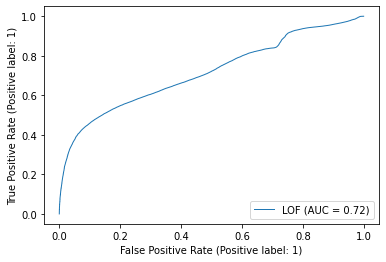

In [19]:

y_hat = lof.decision_function(X_test)
RocCurveDisplay.from_predictions(
    y_test,
    ,
    pos_label=1,
    name='LOF',
    linewidth=1
)

In [ ]:
sklearn.metrics.roc_curve(y_true, y_score